In [9]:
import SimpleITK as sitk
import os
import matplotlib.pyplot as plt
import numpy as np

In [16]:
fixed_image_path = "/home/umcg/Desktop/Teaching/ImageRegistration/Square1.jpg"
moving_image_path = "/home/umcg/Desktop/Teaching/ImageRegistration/Square2.jpg"

In [17]:
#Load
fixed_image = sitk.ReadImage(fixed_image_path, sitk.sitkFloat32)
moving_image = sitk.ReadImage(moving_image_path, sitk.sitkFloat32)

fixed_array = sitk.GetArrayFromImage(fixed_image)
moving_array = sitk.GetArrayFromImage(moving_image)

Image dimensions: Image:  (512, 512)  Image 2: (512, 512)


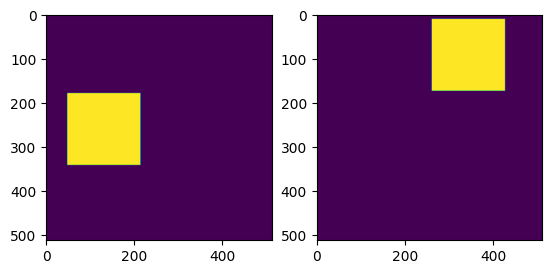

In [18]:
print("Image dimensions: Image: ",fixed_array.shape," Image 2:", moving_array.shape)
plt.subplot(121),plt.imshow(fixed_array)
plt.subplot(122),plt.imshow(moving_array)
plt.show()

In [21]:
#Initial Transform
initial_transform = sitk.CenteredTransformInitializer(fixed_image, 
                                                      moving_image, 
                                                      sitk.Similarity2DTransform(),
                                                      sitk.CenteredTransformInitializerFilter.MOMENTS
)

registration_method = sitk.ImageRegistrationMethod()

#METRICS
#registration_method.SetMetricAsCorrelation()
registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=100)
#registration_method.SetMetricAsMeanSquares()
registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
registration_method.SetMetricSamplingPercentage(0.2)

#OPTIMIZER
registration_method.SetOptimizerAsRegularStepGradientDescent(learningRate=1.0, numberOfIterations=300,minStep=0.00001,gradientMagnitudeTolerance=1e-6)
#registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=200, convergenceMinimumValue=1e-6, convergenceWindowSize=10)
registration_method.SetOptimizerScalesFromIndexShift()

#Registration
registration_method.SetInitialTransform(initial_transform, inPlace=False)
final_transform = registration_method.Execute(fixed_image, moving_image)
evaluationMetric = registration_method.GetMetricValue()
print(f"Final metric value : {evaluationMetric}")
print(f"Optimizer's stopping condition : {registration_method.GetOptimizerStopConditionDescription()}")
print(f"Iteration : {registration_method.GetOptimizerIteration()}")
moving_resampled = sitk.Resample(moving_image, fixed_image, final_transform, sitk.sitkLinear, 0.0, moving_image.GetPixelID())


Final metric value : -0.624797401464203
Optimizer's stopping condition : RegularStepGradientDescentOptimizerv4: Gradient magnitude tolerance met after 27 iterations. Gradient magnitude (4.61128e-07) is less than gradient magnitude tolerance (1e-06).
Iteration : 28


Image dimensions: Image:  (512, 512)  Image 2: (512, 512)


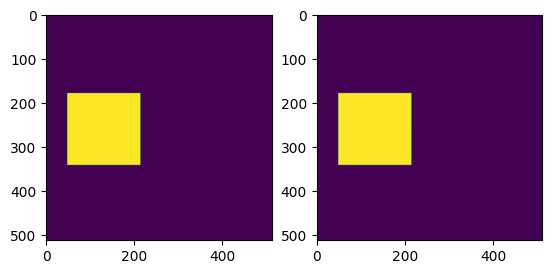

In [22]:
moved_array = sitk.GetArrayFromImage(moving_resampled)
print("Image dimensions: Image: ",fixed_array.shape," Image 2:", moved_array.shape)
plt.subplot(121),plt.imshow(fixed_array)
plt.subplot(122),plt.imshow(moved_array)
plt.show()

In [10]:
print(np.sum(fixed_array),np.sum(moved_array))
print(np.sum(fixed_array),np.sum(moving_array))

6899174.0 8228757.0
6899174.0 12006442.0
